In [1]:
import pandas as pd

df_24h = pd.read_csv('Total-Load-Day-Ahead-Actual_2018-2023-24Hours-Resampled.csv')

#Column Names
column_headers = list(df_24h)
print(column_headers)

['Time', 'Load Forecast', 'Actual Load']


In [2]:
# Descriptive Stats

print(df_24h[['Load Forecast', 'Actual Load']].describe())

       Load Forecast  Actual Load
count    1557.000000  1557.000000
mean     3505.740303  3394.263988
std       363.842109   326.254421
min      2458.000000  2639.937500
25%      3241.687500  3152.875000
50%      3494.020833  3384.937500
75%      3764.520833  3650.195652
max      4351.543478  4277.479167


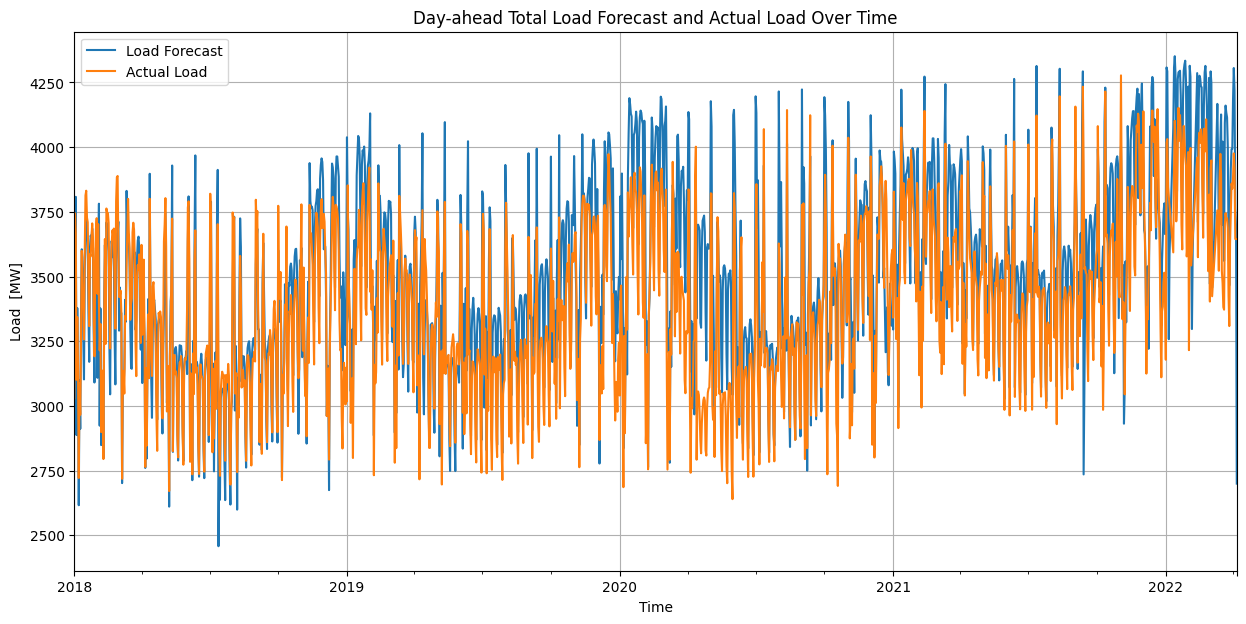

In [3]:
# Visualize the Time Series

import matplotlib.pyplot as plt

import pandas as pd

#Coversion of time from index to dateTime type
df_24h['Time'] = pd.to_datetime(df_24h['Time'], format = '%d/%m/%Y')
df_24h = df_24h.set_index('Time')


df_24h[['Load Forecast', 'Actual Load']].plot(figsize=(15, 7))
plt.title('Day-ahead Total Load Forecast and Actual Load Over Time')
plt.ylabel('Load  [MW]')
plt.xlabel('Time')
plt.grid(True)
plt.show()


#Time ???? 2023 data can be ignored ? till 2023 ?  2022-04-06 05:00:00


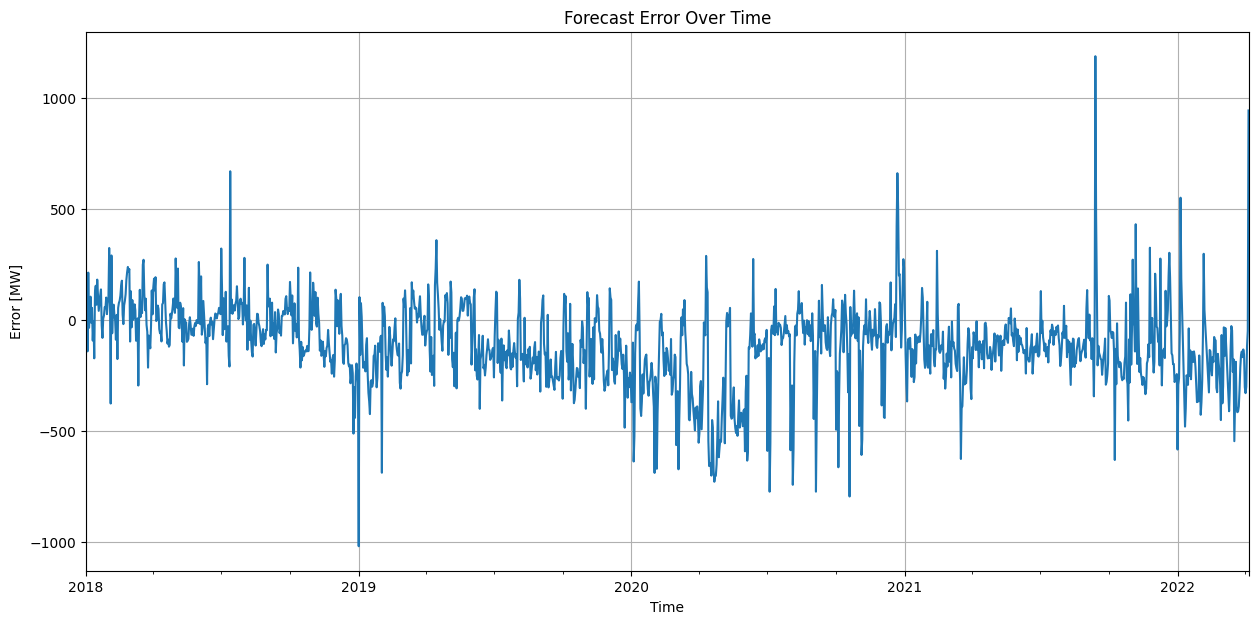

datetime64[ns]


In [4]:
# Visualize Forecast Error

import pandas as pd



df_24h['Error'] = df_24h['Actual Load'] - df_24h['Load Forecast']

df_24h['Error'].plot(figsize=(15, 7))
plt.title('Forecast Error Over Time')
plt.ylabel('Error [MW]')
plt.xlabel('Time')
plt.grid(True)
plt.show()

# Check the datatype of the index
print(df_24h.index.dtype)


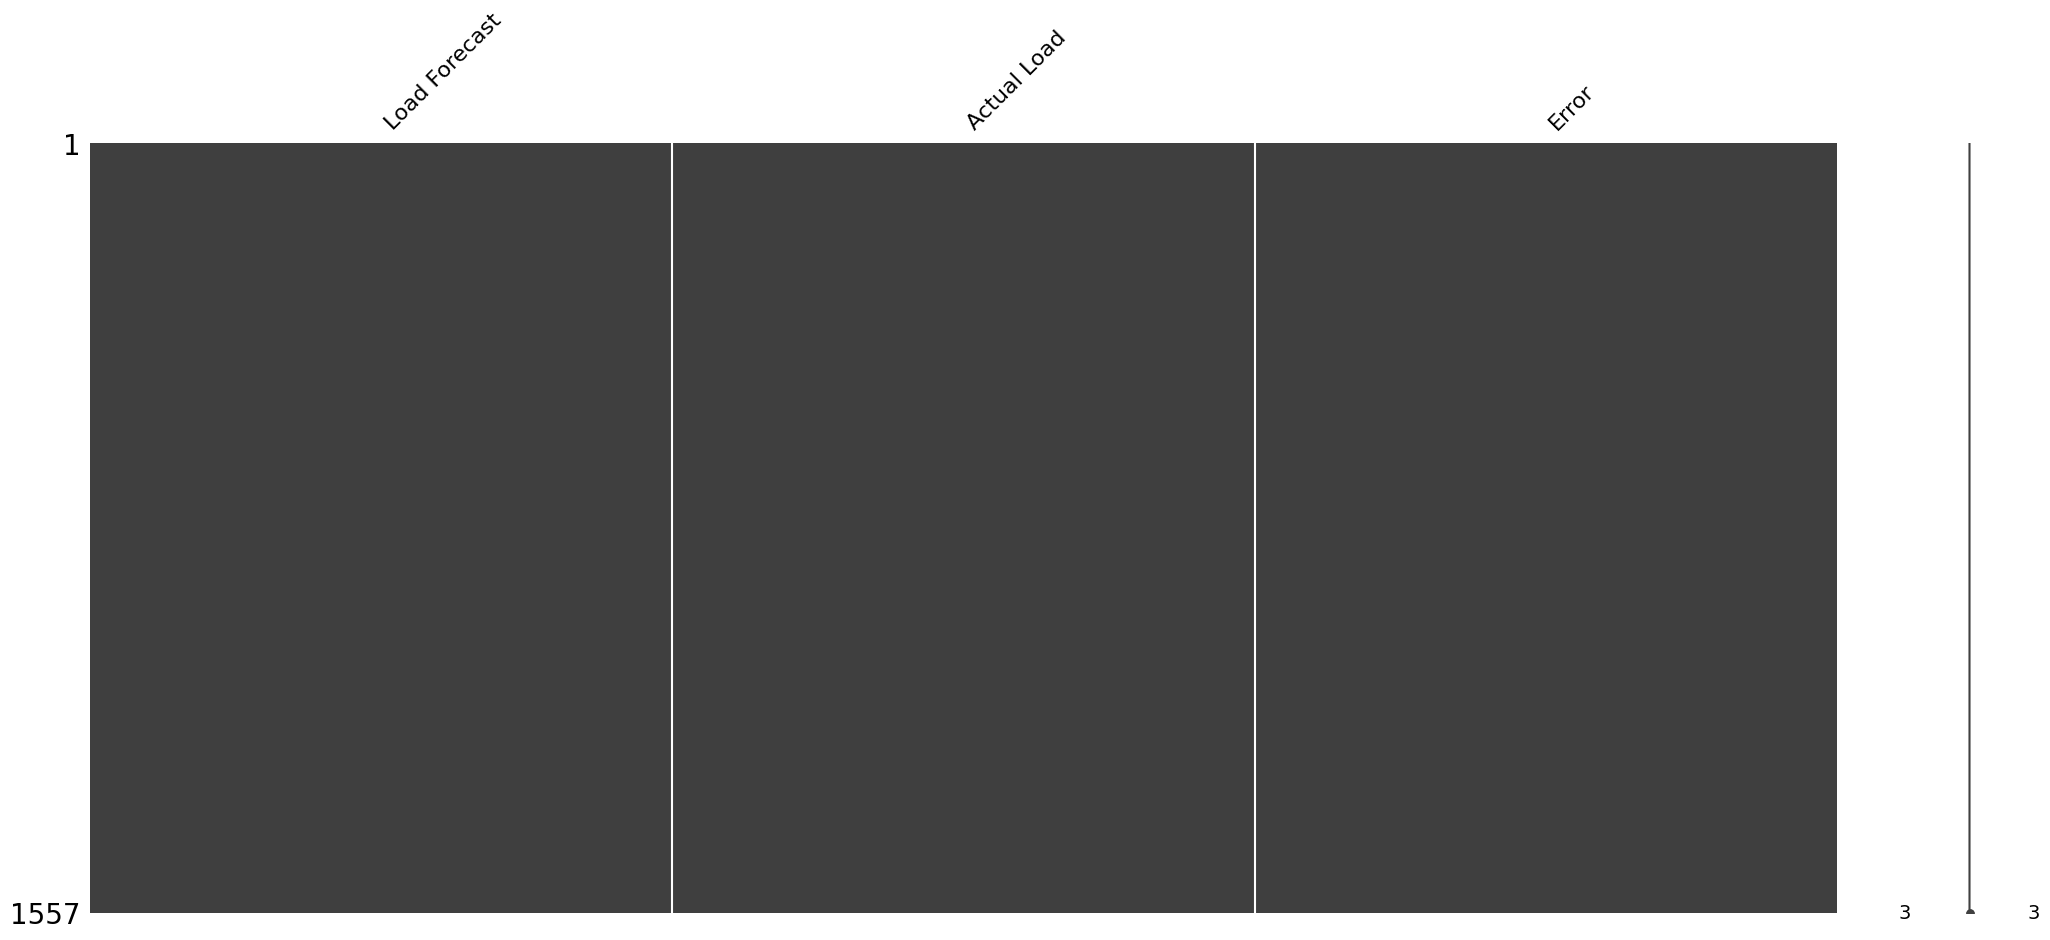

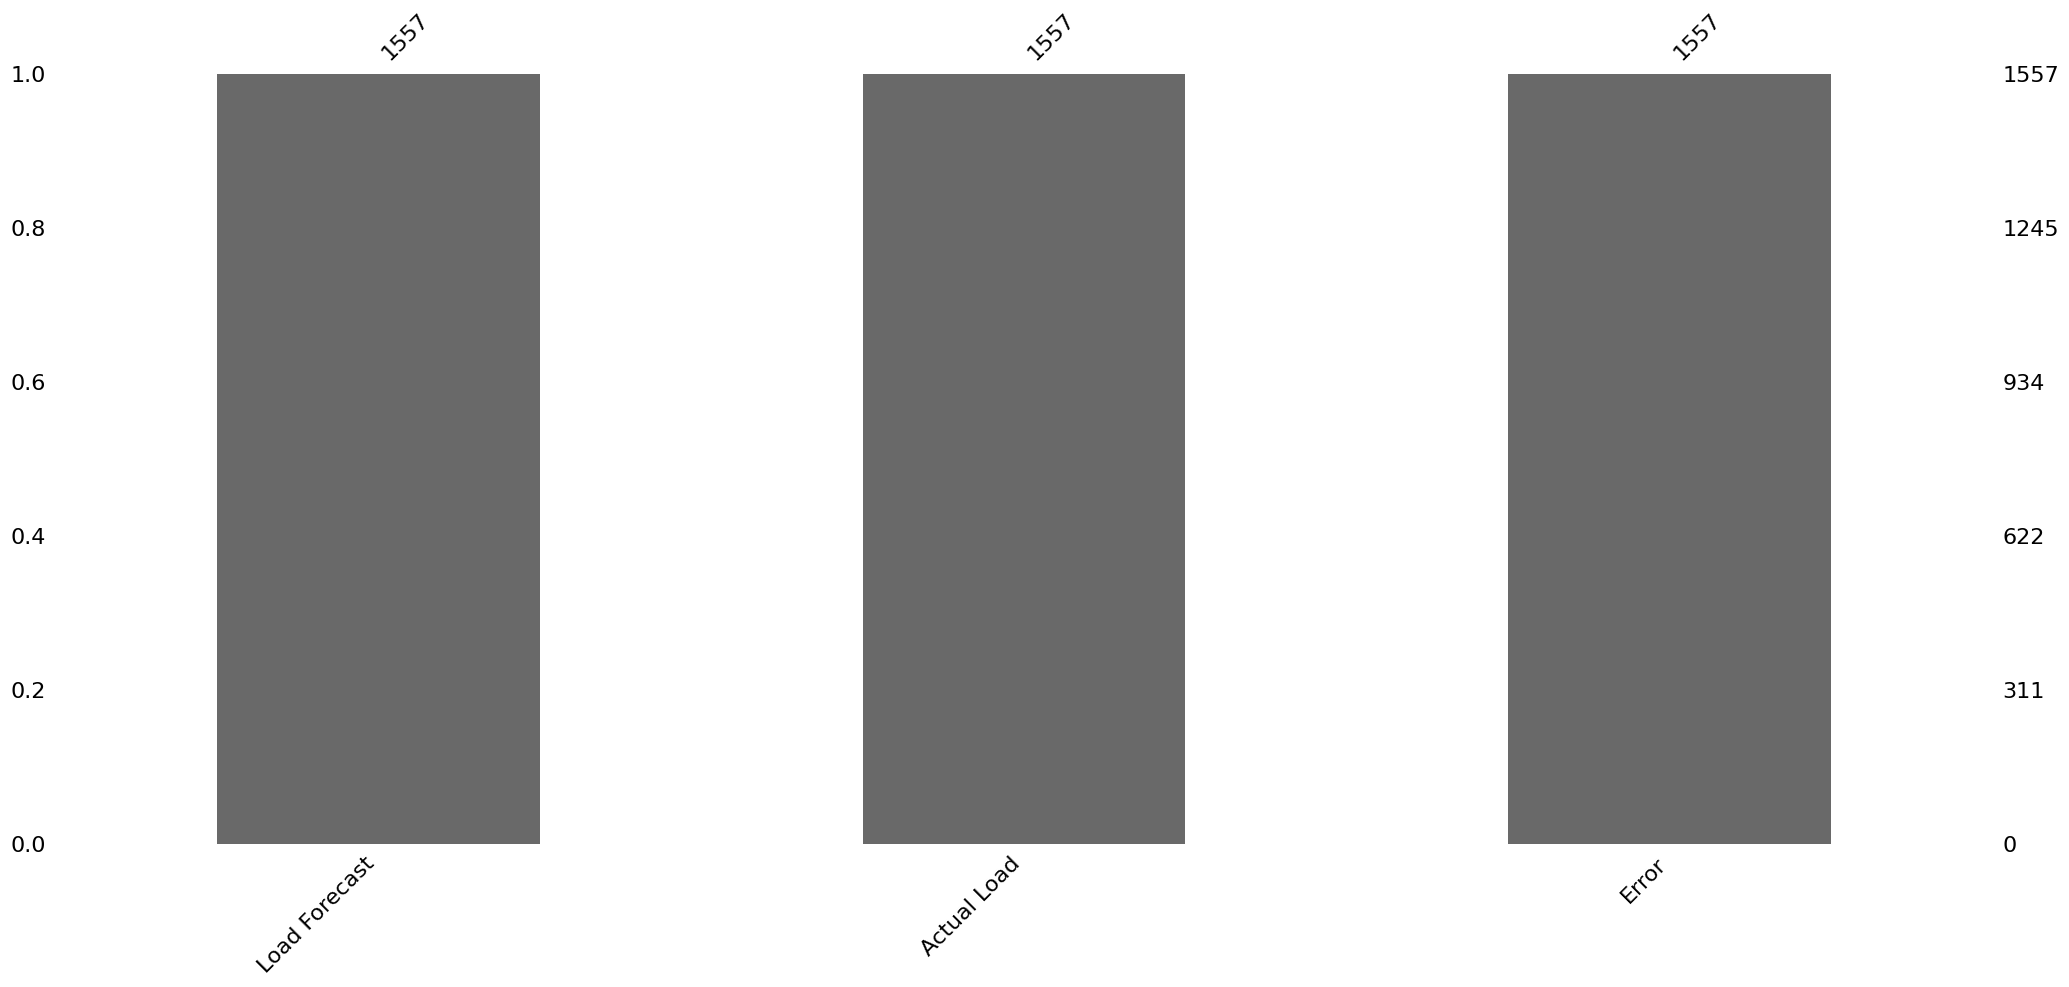


Load Forecast    0
Actual Load      0
Error            0
dtype: int64
 

Total missing values across all variables:  0

Number of duplicated timestamps:  0


In [5]:
# Missing values


import missingno as msno

df_sliced = df_24h['2018-01-01':'2022-12-31']


# Then we plot the missing values
msno.matrix(df_sliced)
plt.show()


print("")

msno.bar(df_sliced)
plt.show()


print("")

print(df_24h.isna().sum())
print(" ")


print("")
total_missing_values = df_sliced.isna().sum().sum()
print("Total missing values across all variables: ", total_missing_values)

print("")
duplicated_rows = df_sliced.index.duplicated()
print("Number of duplicated timestamps: ", duplicated_rows.sum())

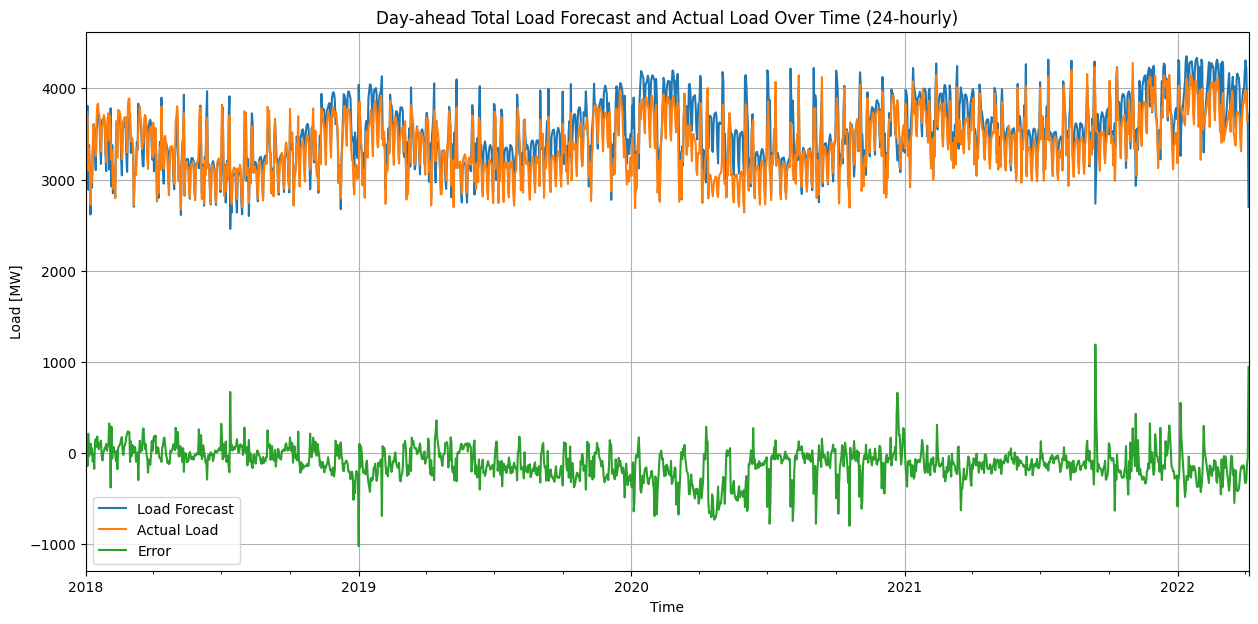

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting the 12-hourly data
df_24h.plot(figsize=(15, 7))
plt.title('Day-ahead Total Load Forecast and Actual Load Over Time (24-hourly)')
plt.ylabel('Load [MW]')
plt.xlabel('Time')
plt.grid(True)
plt.show()

In [7]:
import pandas as pd

# Calculate the error rate
df_24h['Error Rate'] = (df_24h['Actual Load'] - df_24h['Load Forecast']) / df_24h['Actual Load'] * 100

# Print the error rate as a percentage
print(df_24h['Error Rate'])



Time
2018-01-01     0.861613
2018-01-02     2.770653
2018-01-03    -3.858567
2018-01-04     6.888490
2018-01-05    -1.056325
                ...    
2022-04-02    -8.299886
2022-04-03    -7.687509
2022-04-04    -3.221035
2022-04-05    -1.336630
2022-04-06    25.929436
Name: Error Rate, Length: 1557, dtype: float64
